# Introduction to Regression with Neural Networks in TensorFlow

There are many definitions for a regression problem but in our case , we are going to simplify it : predicting a numerical variable based on some other combination of variables. Even shorter, predicting a number!

In [314]:
# Imprt tensorflow 
import tensorflow as tf
print(tf.__version__)

2.9.2


## Creating data to view and fit

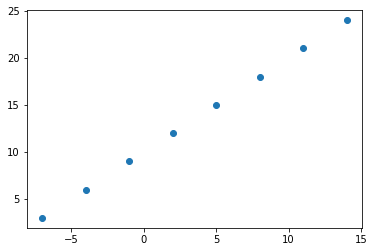

In [315]:
import numpy as np
import matplotlib.pyplot as plt

# Create the features 
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Create labels
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# Visualize it
plt.scatter(X,y);

In [316]:
y == X + 10

array([ True,  True,  True,  True,  True,  True,  True,  True])

## Input and Output shapes


In [317]:
# Create a demo tensor for our housing price prediction problem
house_info = tf.constant(["bedroom", "bathroom", "garage"])
house_price = tf.constant([939700])

house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [318]:
input_shape = X[0].shape
output_shape = y[0].shape

input_shape, output_shape

((), ())

In [319]:
X[0], y[0]

(-7.0, 3.0)

In [320]:
X[1], y[1]

(-4.0, 6.0)

In [321]:
X[0].ndim

0

In [322]:
X[0], y[0]

(-7.0, 3.0)

In [323]:
# Turn our numpy arrays into tensors
X = tf.constant(X)
y = tf.constant(y)
X, y 

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [324]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

(TensorShape([]), TensorShape([]))

## Steps in modelling with TensorFlow 

1. **Creating a model** - define the input and output layers, as well as the hidden layers of a deep learning model.

2. **Compile a model** - define the loss function, in other words, the function which tells our model how wrong it is. And the optimizer which tells our model how to improve the patterns its learning and evaluation metrics (what we can use to interpret the performance of our model).

3. **Fitting a model** - letting the model try to find patterns between X and y (features and labels). 

In [325]:
# Set random seed
tf.random.set_seed(42)

# 1. Create a model using the Sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae, # mae is short for mean absolute error
              optimizer = tf.keras.optimizers.SGD(), # Stochastic Gradient Descent
              metrics = ["mae"])

# 3. Fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=5)

Epoch 1/5
1/1 [==============================] - 0s 450ms/step - loss: 11.5048 - mae: 11.5048
Epoch 2/5
1/1 [==============================] - 0s 10ms/step - loss: 11.3723 - mae: 11.3723
Epoch 3/5
1/1 [==============================] - 0s 9ms/step - loss: 11.2398 - mae: 11.2398
Epoch 4/5
1/1 [==============================] - 0s 10ms/step - loss: 11.1073 - mae: 11.1073
Epoch 5/5
1/1 [==============================] - 0s 7ms/step - loss: 10.9748 - mae: 10.9748


In [326]:
# Check out X and y
X, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [327]:
# Try and make a prediction using our model
y_pred = model.predict([17.0])
y_pred

1/1 [==============================] - 0s 68ms/step


array([[12.716021]], dtype=float32)

## Improving our model

We can improve our model, by altering the steps we took to create a model.

1. **Creating a model** - here we might add more layers, increase the number of hidden units (also called neurons) within each of the hidden layers, change the activation functions of each layer. 

2. **Compiling a model** - here we might change the optimization function or perhaps the **learning rate** of the optimization function. 

3. **Fitting a model** - here we might fit a model for more **epochs** (leave it training for longer) or on more data (give the model more examples to learn from).

In [328]:
# Let's rebuild our model

# 1. Create the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model 
model.compile(loss=tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics=["mae"])

# Fit the model (this time we will train for longer)
model.fit(tf.expand_dims(X, axis=1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 342ms/step - loss: 11.2219 - mae: 11.2219
Epoch 2/100
1/1 [==============================] - 0s 13ms/step - loss: 11.0894 - mae: 11.0894
Epoch 3/100
1/1 [==============================] - 0s 9ms/step - loss: 10.9569 - mae: 10.9569
Epoch 4/100
1/1 [==============================] - 0s 9ms/step - loss: 10.8244 - mae: 10.8244
Epoch 5/100
1/1 [==============================] - 0s 8ms/step - loss: 10.6919 - mae: 10.6919
Epoch 6/100
1/1 [==============================] - 0s 9ms/step - loss: 10.5594 - mae: 10.5594
Epoch 7/100
1/1 [==============================] - 0s 12ms/step - loss: 10.4269 - mae: 10.4269
Epoch 8/100
1/1 [==============================] - 0s 10ms/step - loss: 10.2944 - mae: 10.2944
Epoch 9/100
1/1 [==============================] - 0s 13ms/step - loss: 10.1619 - mae: 10.1619
Epoch 10/100
1/1 [==============================] - 0s 11ms/step - loss: 10.0294 - mae: 10.0294
Epoch 11/100
1/1 [==============================] - 

In [329]:
# Remind ourselves of the data 
X, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [330]:
# Let's see if our model's prediction has improved...
model.predict([17.0])

1/1 [==============================] - 0s 68ms/step


array([[29.739855]], dtype=float32)

In [331]:
# Let's see if we can make another change to improve our model

# 1. Create the model (this time with extra hidden layer with 100 hidden units)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(150, activation=None),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(lr=0.01),
              metrics=['mae'])

# 3. Fit the model
model.fit(tf.expand_dims(X, axis=1), y, epochs=100)

Epoch 1/100


/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


1/1 [==============================] - 1s 605ms/step - loss: 12.7860 - mae: 12.7860
Epoch 2/100
1/1 [==============================] - 0s 10ms/step - loss: 11.6380 - mae: 11.6380
Epoch 3/100
1/1 [==============================] - 0s 11ms/step - loss: 10.4713 - mae: 10.4713
Epoch 4/100
1/1 [==============================] - 0s 9ms/step - loss: 9.2739 - mae: 9.2739
Epoch 5/100
1/1 [==============================] - 0s 11ms/step - loss: 8.0325 - mae: 8.0325
Epoch 6/100
1/1 [==============================] - 0s 14ms/step - loss: 6.8737 - mae: 6.8737
Epoch 7/100
1/1 [==============================] - 0s 10ms/step - loss: 7.1770 - mae: 7.1770
Epoch 8/100
1/1 [==============================] - 0s 10ms/step - loss: 7.6425 - mae: 7.6425
Epoch 9/100
1/1 [==============================] - 0s 13ms/step - loss: 7.7189 - mae: 7.7189
Epoch 10/100
1/1 [==============================] - 0s 12ms/step - loss: 7.3874 - mae: 7.3874
Epoch 11/100
1/1 [==============================] - 0s 9ms/step - loss: 6.9

In [332]:
# Let's remind ourselves of the data
X, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [333]:
# Let's try to make a prediction
model.predict([17.0])

1/1 [==============================] - 0s 66ms/step


array([[27.484612]], dtype=float32)

### Evaluating a model

In practice, a typical workflow you will go through when building neural netoworks is :

```
Build a model -> fit it -> evaluate it -> tweak a model -> fit it -> evaluate it -> tweak a model -> fit it -> evaluate it ....
```

When it comes to evaluation... there are three words you should memorize:

> "Visualize, Visualize, Visualize"

It's a good idea to visualize:
* The data - what data are we working with? What does it look like ?
* The model itself - what does our model look like?
* The training of a model - how does a model perform while it learns?
* The predictions of the model - how do the predictions of a model line up against the ground truth (the original labels)?

In [334]:
# Make a bigger dataset
X = tf.range(-100, 100, 4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [335]:
# Make labels for the dataset
y = X + 10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

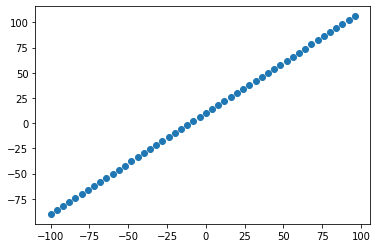

In [336]:
# Visualize the data 
import matplotlib.pyplot as plt

plt.scatter(X, y)

### The 3 sets...

* **Training set** - the model learns from this data, which is typically 70-80% of the total data you have available.

* **Validation set** - the model gets tuned on this data, which is typically 10-15% of the data available. 

* **Test set** - the model gets evaluated on this data to test what it has learned, this set is typically 10-15% of the total data available. 

In [337]:
# Check the length of how many samples we have
len(X)

50

In [338]:
# Split the data into train and test sets
X_train = X[:40] # First 40 training samples (80% of the data)
y_train = y[:40]

X_test = X[40:] # last 10 are testing samples (20% of the data)
y_test = y[40:]

len(X_train), len(X_test), len(y_train), len(y_test)

(40, 10, 40, 10)

### Visualizing the data

Now we have got our data in training and test sets... let's visualize it again!

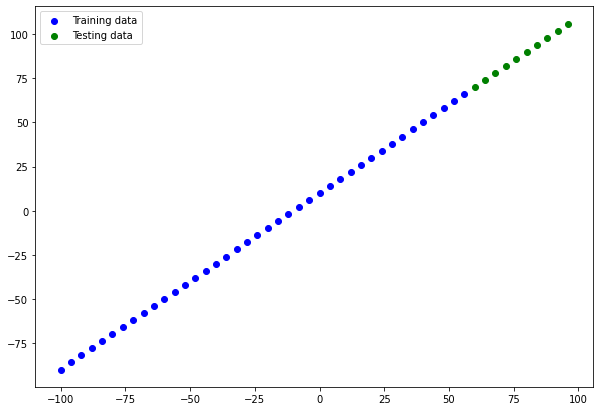

In [339]:
plt.figure(figsize=(10,7))
# Plot training data in blue
plt.scatter(X_train, y_train, c="b", label="Training data")
# Plot test data in green
plt.scatter(X_test, y_test, c="g", label="Testing data")
# Show a legend
plt.legend();

In [340]:
# Let's have a look at how to build a neural network for our data 

# 1. Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model 
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=['mae'])

# 3. Fit the model
# model.fit(X_train, y_train, epochs=100)

### Visualizing the model


In [341]:
# model.summary()

In [342]:
# Let's create a model which builds automatically by defining the input_shape argument in the first layer
tf.random.set_seed(42)

# Create a model (same as above)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape=[1], name="input_layer"),
    tf.keras.layers.Dense(1, name="output_layer")
], name="model_1")

# Compile the model (same as above)
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=['mae'])

In [343]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


* Total params - total number of parameters in the model.

* Trainable parameters - these are parameters (patterns) the model can update as it trains. 

* Non-trainable params - these params are not updated during training (this is typical when you bring in already learned patterns or parameters from other models during **transfer learning**).

**Resource:** For a more in-depth overview of the trainable parameters withing a layer, check out MIT's [introduction to deep learning video](https://ocw.mit.edu/courses/6-s191-introduction-to-deep-learning-january-iap-2020/). 

**Exercise:** Try playing around with the number of hidden units in the dense layer, see how that affects the number of parameters (total and trainable) by calling `model.summary()`. 

In [344]:
# Let's fit our model to the training data
model.fit(X_train, y_train, epochs=100, verbose=0)

In [345]:
# Get a summary of our model 
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


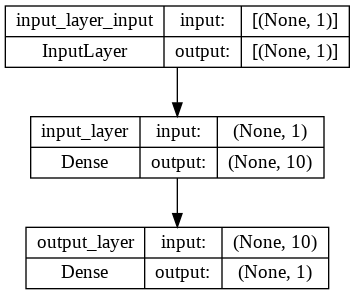

In [346]:
from tensorflow.keras.utils import plot_model

plot_model(model=model, show_shapes=True)

### Visualizing our model's predictions

To visualize predictions, it's a good idea to plot them against the ground truth labels. 

Often you will see this in the form of `y_test` or `y_true` versus `y_pred` (ground truth versus your model's predictions).

In [347]:
# Make some predictions 
y_pred = model.predict(X_test)

y_pred

1/1 [==============================] - 0s 57ms/step


array([[ 70.552185],
       [ 75.13991 ],
       [ 79.72764 ],
       [ 84.315346],
       [ 88.90308 ],
       [ 93.49081 ],
       [ 98.07852 ],
       [102.666245],
       [107.253975],
       [111.84169 ]], dtype=float32)

In [348]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

🔑 **Note:** If you feel like you are going to reuse some kind of functionality in the future, it's a good idea to turn it into a function.

In [349]:
# Let's create a plotting function
def plot_predictions(train_data = X_train,
                     train_labels=y_train,
                     test_data = X_test,
                     test_labels = y_test,
                     predictions=y_pred):
    """
    Plots training data, test data and compares predictions to ground truth labels.
    """
    plt.figure(figsize=(10,7))
    # Plot training data in blue
    plt.scatter(train_data, train_labels, c="b", label="Training data")
    # Plot testing data in green
    plt.scatter(test_data, test_labels, c="g", label="Testing data")
    # Plot model's predictions in red
    plt.scatter(test_data, predictions, c="r", label="Predictions")
    # Show the legend
    plt.legend();

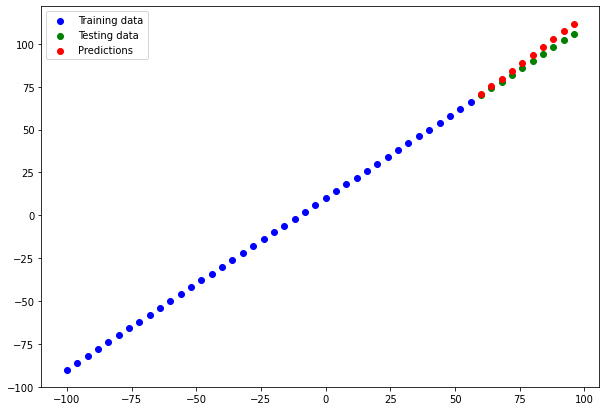

In [350]:
plot_predictions(train_data = X_train,
                 train_labels = y_train,
                 test_data = X_test,
                 test_labels=y_test,
                 predictions=y_pred)

### Evaluating our model's predictions with regression evaluation metrics

Depending on the problem you are working on, there will be different evaluation metrics to evaluate your model's performance.

Since we are working on a regression, two of main metrics:

* MAE - mean absolute error, "on average, how wrong is each of my model's predictions"

* MSE - mean square error, "square the average errors"

In [351]:
# Evaluate the model on the test set
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 140ms/step - loss: 3.1969 - mae: 3.1969


[3.1969382762908936, 3.1969382762908936]

In [352]:
# Calculate the mean absolute error
mae = tf.metrics.mean_absolute_error(y_true = y_test, 
                                     y_pred = tf.constant(y_pred))
mae

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([17.558252 , 14.1160555, 11.708944 , 10.336931 , 10.       ,
       10.698161 , 12.447113 , 15.332995 , 19.253975 , 23.84169  ],
      dtype=float32)>

In [353]:
tf.constant(y_pred)

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[ 70.552185],
       [ 75.13991 ],
       [ 79.72764 ],
       [ 84.315346],
       [ 88.90308 ],
       [ 93.49081 ],
       [ 98.07852 ],
       [102.666245],
       [107.253975],
       [111.84169 ]], dtype=float32)>

In [354]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [355]:
tf.squeeze(y_pred)

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([ 70.552185,  75.13991 ,  79.72764 ,  84.315346,  88.90308 ,
        93.49081 ,  98.07852 , 102.666245, 107.253975, 111.84169 ],
      dtype=float32)>

In [356]:
# Calculate the mean absolute error
mae = tf.metrics.mean_absolute_error(y_true=y_test,
                                     y_pred = tf.squeeze(y_pred))

mae

<tf.Tensor: shape=(), dtype=float32, numpy=3.19694>

In [357]:
# Calculate the mean squared error
mse = tf.metrics.mean_squared_error(y_true=y_test,
                                     y_pred = tf.squeeze(y_pred))

mse

<tf.Tensor: shape=(), dtype=float32, numpy=13.070127>

In [358]:
# Make some functions to reuse MAE and MSE 
def mae(y_true, y_pred):
    return tf.metrics.mean_absolute_error(y_true=y_true,
                                          y_pred=tf.squeeze(y_pred))
    
def mse(y_true, y_pred):
    return tf.metrics.mean_squared_error(y_true=y_true,
                                         y_pred=tf.squeeze(y_pred))

### Running Experiments to improve our model

```
Build a model -> fit it -> evaluate it -> tweak it -> fit it -> evaluate it -> tweak it -> fit it -> evaluate it 
```

1. Get more data - get more examples for your model to train on (more opportunities to learn patterns or relationships between features and labels).

2. Make your model larger (using a more complex model) - this might come in the form of more layers or more hidden units in each layer. 

3. Train for longer - give your model more of a chance to find patterns in the data. 

Let's do 3 modelling experiments:

1. `model_1` - same as original model , 1 layer, trained for 100 epochs.

2. `model_2` - 2 layers trained for a 100 epochs 

3. `model_3` - 2 layers, trained for 500 epochs

**Build `model_1`** 

In [359]:
# Set random seed 
tf.random.set_seed(42)

# 1. Create the model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model 
model_1.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mae"])

# 3. Fit the model
model_1.fit(tf.expand_dims(X_train, axis=1), y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 12ms/step - loss: 15.9024 - mae: 15.9024
Epoch 2/100
2/2 [==============================] - 0s 7ms/step - loss: 11.2837 - mae: 11.2837
Epoch 3/100
2/2 [==============================] - 0s 7ms/step - loss: 11.1075 - mae: 11.1075
Epoch 4/100
2/2 [==============================] - 0s 5ms/step - loss: 9.2990 - mae: 9.2990
Epoch 5/100
2/2 [==============================] - 0s 7ms/step - loss: 10.1677 - mae: 10.1677
Epoch 6/100
2/2 [==============================] - 0s 6ms/step - loss: 9.4303 - mae: 9.4303
Epoch 7/100
2/2 [==============================] - 0s 6ms/step - loss: 8.5704 - mae: 8.5704
Epoch 8/100
2/2 [==============================] - 0s 5ms/step - loss: 9.0442 - mae: 9.0442
Epoch 9/100
2/2 [==============================] - 0s 6ms/step - loss: 18.7517 - mae: 18.7517
Epoch 10/100
2/2 [==============================] - 0s 7ms/step - loss: 10.1142 - mae: 10.1142
Epoch 11/100
2/2 [==============================] - 0s 6ms/step - 

1/1 [==============================] - 0s 130ms/step


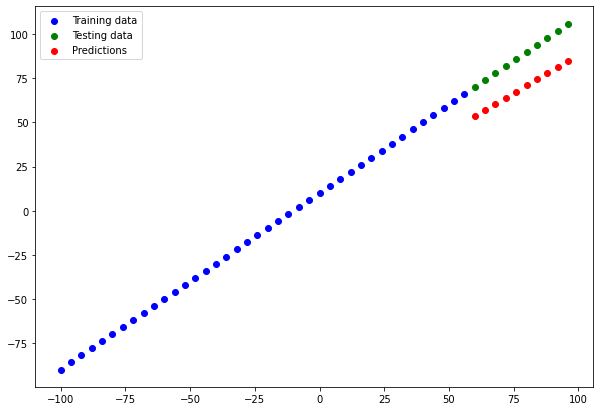

In [360]:
# Make and plot predictions for model_1
y_preds_1 = model_1.predict(X_test)
plot_predictions(predictions=y_preds_1)

In [361]:
tf.constant(y_preds_1), tf.squeeze(y_preds_1)

(<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
 array([[53.57109 ],
        [57.05633 ],
        [60.541573],
        [64.02681 ],
        [67.512054],
        [70.99729 ],
        [74.48254 ],
        [77.96777 ],
        [81.45301 ],
        [84.938255]], dtype=float32)>,
 <tf.Tensor: shape=(10,), dtype=float32, numpy=
 array([53.57109 , 57.05633 , 60.541573, 64.02681 , 67.512054, 70.99729 ,
        74.48254 , 77.96777 , 81.45301 , 84.938255], dtype=float32)>)

In [362]:
# Calculate model_1 evaluation metrics
mae_1 = mae(y_test, y_preds_1)
mse_1 = mse(y_test, y_preds_1)
mae_1, mse_1

(<tf.Tensor: shape=(), dtype=float32, numpy=18.745327>,
 <tf.Tensor: shape=(), dtype=float32, numpy=353.57336>)

**Build `model_2`**

* 2 dense layers, trained for a 100 epochs

In [363]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create the model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_2.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mse"])

# 3. Fit the model
model_2.fit(tf.expand_dims(X_train, axis=1), y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 1s 7ms/step - loss: 27.4058 - mse: 1084.1482
Epoch 2/100
2/2 [==============================] - 0s 5ms/step - loss: 24.6339 - mse: 777.9203
Epoch 3/100
2/2 [==============================] - 0s 7ms/step - loss: 29.8935 - mse: 1334.8953
Epoch 4/100
2/2 [==============================] - 0s 9ms/step - loss: 27.4055 - mse: 1106.8035
Epoch 5/100
2/2 [==============================] - 0s 7ms/step - loss: 14.9463 - mse: 281.1076
Epoch 6/100
2/2 [==============================] - 0s 8ms/step - loss: 11.8819 - mse: 168.6621
Epoch 7/100
2/2 [==============================] - 0s 7ms/step - loss: 11.1988 - mse: 151.3508
Epoch 8/100
2/2 [==============================] - 0s 9ms/step - loss: 11.0910 - mse: 160.3745
Epoch 9/100
2/2 [==============================] - 0s 13ms/step - loss: 40.4763 - mse: 2586.0085
Epoch 10/100
2/2 [==============================] - 0s 9ms/step - loss: 27.8687 - mse: 1094.4380
Epoch 11/100
2/2 [=========================

1/1 [==============================] - 0s 81ms/step


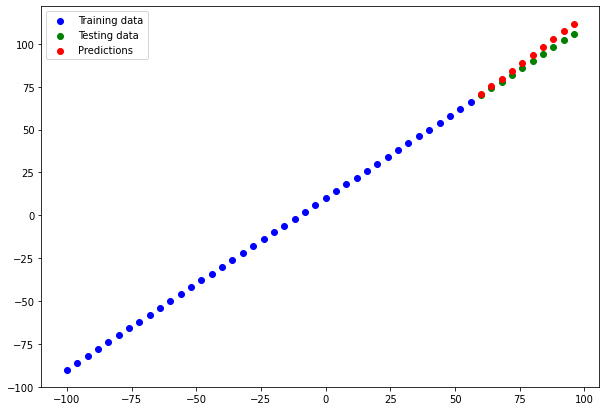

In [364]:
# Make and plot predictions of model_2
y_preds_2 = model_2.predict(X_test)
plot_predictions(predictions = y_preds_2)

In [365]:
# Calculate model_2 evaluation metrics
mae_2 = mae(y_test, y_preds_2)
mse_2 = mse(y_test, y_preds_2)
mae_2, mse_2

(<tf.Tensor: shape=(), dtype=float32, numpy=3.19694>,
 <tf.Tensor: shape=(), dtype=float32, numpy=13.070127>)

**Build `model_3`**

* 2 layers, trained for 500 epochs

In [366]:
# Set random seed
tf.random.set_seed(42)

# 1. Create a model 
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mae"])

# 3. Fit the model
model_3.fit(tf.expand_dims(X_train, axis=1), y_train, epochs=500)

Epoch 1/500
2/2 [==============================] - 1s 13ms/step - loss: 27.4058 - mae: 27.4058
Epoch 2/500
2/2 [==============================] - 0s 9ms/step - loss: 24.6339 - mae: 24.6339
Epoch 3/500
2/2 [==============================] - 0s 13ms/step - loss: 29.8935 - mae: 29.8935
Epoch 4/500
2/2 [==============================] - 0s 11ms/step - loss: 27.4055 - mae: 27.4055
Epoch 5/500
2/2 [==============================] - 0s 16ms/step - loss: 14.9463 - mae: 14.9463
Epoch 6/500
2/2 [==============================] - 0s 7ms/step - loss: 11.8819 - mae: 11.8819
Epoch 7/500
2/2 [==============================] - 0s 17ms/step - loss: 11.1988 - mae: 11.1988
Epoch 8/500
2/2 [==============================] - 0s 12ms/step - loss: 11.0910 - mae: 11.0910
Epoch 9/500
2/2 [==============================] - 0s 8ms/step - loss: 40.4763 - mae: 40.4763
Epoch 10/500
2/2 [==============================] - 0s 6ms/step - loss: 27.8687 - mae: 27.8687
Epoch 11/500
2/2 [==============================] - 0

1/1 [==============================] - 0s 193ms/step


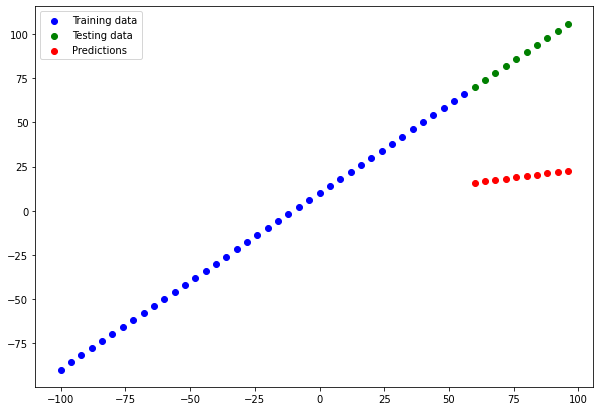

In [367]:
# Make and plot some predictions 
y_preds_3 = model_3.predict(X_test)
plot_predictions(predictions=y_preds_3)

In [368]:
# Calculate model_3 evaluation metrics
mae_3 = mae(y_test, y_preds_3)
mse_3 = mse(y_test, y_preds_3)
mae_3, mse_3

(<tf.Tensor: shape=(), dtype=float32, numpy=68.713615>,
 <tf.Tensor: shape=(), dtype=float32, numpy=4808.0273>)

🔑 **Note:** You want to start with small expriments (small models) and make sure they work and then increase their scale when necessary.

## Comparing the results of our experiments

We have run a few experiments now , let's compare the results.

In [369]:
# Let's compare our model's results using a pandas DataFrame
import pandas as pd

model_results = [["model_1", mae_1.numpy(), mse_1.numpy()],
                 ["model_2", mae_2.numpy(), mse_2.numpy()],
                 ["model_3", mae_3.numpy(), mse_3.numpy()]]

all_results = pd.DataFrame(model_results, columns=['model', 'mae', 'mse'])
all_results

,model,mae,mse
0,model_1,18.745327,353.573364
1,model_2,3.196940,13.070127
2,model_3,68.713615,4808.027344


In [370]:
model_2.summary()

Model: "sequential_52"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_81 (Dense)            (None, 10)                20        
                                                                 
 dense_82 (Dense)            (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


Looks like `model_2` performed the best...

> 🔑 **Notes:** One of the main goals should be to minimize the time between your experiments. The more experiment you do, the more things you figure out which do not work , you will get closer to figuring out what does work. Remember the machine learning practioner's motto: "Experiment, experiment, experiment".

## Tracking your experiments 

One really good habit in machine learning modelling is to track the results of your experiments.

And when doing so, it can be tedious if you are running lots of experiments. 

Luckily, there are tools to help us!

📑 **Resource:** As you build more models, you will want to look into using:

* Tensorboard - a component of the TensorFlow library to help track modelling experiments (we will see this one later).

* Weights and Biases - a tool for tracking all kinds of machine learning experiments (plugs straight into TensorBoard).


## Saving our models 

Saving our models allows us to use them outside of Google Colab (or wherever they were trained) such as in a web application or mobile app. 

There are two main formats we can save our models to:

1. The SavedModel format

2. The HDF5 format


In [371]:
# Save model using the SavedModel format 
model_2.save("best_model_SavedModel_format")

In [372]:
# Save model using the HDF5 format
model_2.save("best_model_HDF5_format.h5")

## Loading in a saved model

In [373]:
# Load in the SavedModel format model
loaded_SavedModel_format = tf.keras.models.load_model('/content/best_model_HDF5_format')
loaded_SavedModel_format.summary()

Model: "sequential_29"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_36 (Dense)            (None, 10)                20        
                                                                 
 dense_37 (Dense)            (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [374]:
# Compare model_2 predictions with SavedModel format model predictions
model_2_preds = model_2.predict(X_test)
loaded_SavedModel_format_preds = loaded_SavedModel_format.predict(X_test)
model_2_preds == loaded_SavedModel_format_preds

1/1 [==============================] - 0s 88ms/step


array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

In [375]:
# Compare the mae of model_2_preds and loaded_SavedModel_preds
mae(y_true=y_test, y_pred = model_2_preds) == mae(y_true=y_test, y_pred = loaded_SavedModel_format_preds)

<tf.Tensor: shape=(), dtype=bool, numpy=True>

In [376]:
# Load in the model using .h5 format
loaded_h5_model = tf.keras.models.load_model('/content/best_model_HDF5_format.h5')
loaded_h5_model.summary()

Model: "sequential_52"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_81 (Dense)            (None, 10)                20        
                                                                 
 dense_82 (Dense)            (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [377]:
# Check to see if loaded .h5 model predictions match model_2
model_2_preds = model_2.predict(X_test)
loaded_h5_model_preds = loaded_h5_model.predict(X_test)
model_2_preds == loaded_h5_model_preds

1/1 [==============================] - 0s 95ms/step


array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

## Download a model (or any other file) from Google Colab

If you want to download your files from Google Colab:

1. You can go to the "files" tab and right click on the file you are after and click "download". 

2. Use code (see the cell below).

3. Save it to Google Drive by connecting google drive and copying it there (see the second code cell below). 

In [378]:
# Download a file from google colab, we can import from google.colab import files 
from google.colab import files
files.download("/content/best_model_HDF5_format.h5")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [379]:
# Save a file from Google Colab to Google Drive (requires mounting google drive)
!cp /content/best_model_HDF5_format.h5 "/content/drive/MyDrive/Data Science WorkSpace/Deep Learning Projects Part 2/Learning Tensorflow from Scratch with Daniel"

In [380]:
!ls "/content/drive/MyDrive/Data Science WorkSpace/Deep Learning Projects Part 2/Learning Tensorflow from Scratch with Daniel"

00_Tensorflow_fundamentals.ipynb		    best_model_HDF5_format.h5
01_Neural_Network_Regression_With_TensorFlow.ipynb


## A larger example

In [381]:
X_train, y_train

(<tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
         -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
         -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
          32,   36,   40,   44,   48,   52,   56], dtype=int32)>,
 <tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
        -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
         14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
         66], dtype=int32)>)

In [382]:
# Import required libraries
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

In [383]:
# Read in the insurance datasets
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [384]:
insurance_one_hot = pd.get_dummies(insurance)
insurance_one_hot.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [385]:
# Create X and y values (features and labels)
X = insurance_one_hot.drop('charges', axis=1)
y = insurance_one_hot['charges']
X.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0


In [386]:
# View y
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

In [387]:
# Create training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
len(X), len(X_train), len(X_test)

(1338, 1070, 268)

In [388]:
X_train

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
560,46,19.950,2,1,0,1,0,0,1,0,0
1285,47,24.320,0,1,0,1,0,1,0,0,0
1142,52,24.860,0,1,0,1,0,0,0,1,0
969,39,34.320,5,1,0,1,0,0,0,1,0
486,54,21.470,3,1,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1095,18,31.350,4,1,0,1,0,1,0,0,0
1130,39,23.870,5,1,0,1,0,0,0,1,0
1294,58,25.175,0,0,1,1,0,1,0,0,0
860,37,47.600,2,1,0,0,1,0,0,0,1


In [389]:
# Build a neural network (sort of like model_2 above)
tf.random.set_seed(42)

# 1. Create a model
insurance_model = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
insurance_model.compile(loss=tf.keras.losses.mae,
                        optimizer = tf.keras.optimizers.SGD(),
                        metrics = ['mae'])

# Fit the model
insurance_model.fit(X_train, y_train, epochs=100)

Epoch 1/100
34/34 [==============================] - 1s 8ms/step - loss: 8637.0996 - mae: 8637.0996
Epoch 2/100
34/34 [==============================] - 0s 6ms/step - loss: 7886.7769 - mae: 7886.7769
Epoch 3/100
34/34 [==============================] - 0s 5ms/step - loss: 7558.1475 - mae: 7558.1475
Epoch 4/100
34/34 [==============================] - 0s 5ms/step - loss: 7792.0220 - mae: 7792.0220
Epoch 5/100
34/34 [==============================] - 0s 4ms/step - loss: 7748.3892 - mae: 7748.3892
Epoch 6/100
34/34 [==============================] - 0s 4ms/step - loss: 7595.3940 - mae: 7595.3940
Epoch 7/100
34/34 [==============================] - 0s 3ms/step - loss: 7589.9849 - mae: 7589.9849
Epoch 8/100
34/34 [==============================] - 0s 3ms/step - loss: 7698.5591 - mae: 7698.5591
Epoch 9/100
34/34 [==============================] - 0s 3ms/step - loss: 7496.7788 - mae: 7496.7788
Epoch 10/100
34/34 [==============================] - 0s 3ms/step - loss: 7493.1743 - mae: 7493.1743

In [390]:
# Check the results of the insurance model on the test data
insurance_model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 7023.3286 - mae: 7023.3286


[7023.32861328125, 7023.32861328125]

In [391]:
y_train.median(), y_train.mean()

(9575.4421, 13346.089736364485)

Right now it looks like our model is not performing too well . Let's try and improve it!

To (try) improve our model, we will run 2 experiments:
1. Add an extra layer with more hidden units and use the Adam optimizer.
2. Same as above but train for longer (200 epochs)
3. (Insert your own experiment here)

#### `Insurance_model 2`

In [392]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model
insurance_model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
insurance_model_2.compile(loss = tf.keras.losses.mae,
                          optimizer = tf.keras.optimizers.Adam(),
                          metrics=['mae'])

# 3. Fit the model
insurance_model_2.fit(X_train, y_train, epochs=100)

Epoch 1/100
34/34 [==============================] - 1s 3ms/step - loss: 13273.1602 - mae: 13273.1602
Epoch 2/100
34/34 [==============================] - 0s 3ms/step - loss: 13104.4297 - mae: 13104.4297
Epoch 3/100
34/34 [==============================] - 0s 2ms/step - loss: 12749.5420 - mae: 12749.5420
Epoch 4/100
34/34 [==============================] - 0s 2ms/step - loss: 12055.7510 - mae: 12055.7510
Epoch 5/100
34/34 [==============================] - 0s 3ms/step - loss: 10905.8154 - mae: 10905.8154
Epoch 6/100
34/34 [==============================] - 0s 2ms/step - loss: 9457.7217 - mae: 9457.7217
Epoch 7/100
34/34 [==============================] - 0s 2ms/step - loss: 8147.6543 - mae: 8147.6543
Epoch 8/100
34/34 [==============================] - 0s 2ms/step - loss: 7528.8408 - mae: 7528.8408
Epoch 9/100
34/34 [==============================] - 0s 3ms/step - loss: 7429.1528 - mae: 7429.1528
Epoch 10/100
34/34 [==============================] - 0s 2ms/step - loss: 7409.0811 - mae:

In [393]:
# Evaluate the larger model
insurance_model_2.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 4924.4956 - mae: 4924.4956


[4924.49560546875, 4924.49560546875]

In [394]:
# Comparing previous larger model 
insurance_model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 5ms/step - loss: 7023.3286 - mae: 7023.3286


[7023.32861328125, 7023.32861328125]

#### `Insurance model 3`

In [395]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model (same as above)
insurance_model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
insurance_model_3.compile(loss=tf.keras.losses.mae,
                          optimizer = tf.keras.optimizers.Adam(),
                          metrics=['mae'])
# 3. Fit the model
history = insurance_model_3.fit(X_train, y_train, epochs=200)

Epoch 1/200
34/34 [==============================] - 1s 2ms/step - loss: 13273.1602 - mae: 13273.1602
Epoch 2/200
34/34 [==============================] - 0s 2ms/step - loss: 13104.4297 - mae: 13104.4297
Epoch 3/200
34/34 [==============================] - 0s 3ms/step - loss: 12749.5420 - mae: 12749.5420
Epoch 4/200
34/34 [==============================] - 0s 2ms/step - loss: 12055.7510 - mae: 12055.7510
Epoch 5/200
34/34 [==============================] - 0s 2ms/step - loss: 10905.8154 - mae: 10905.8154
Epoch 6/200
34/34 [==============================] - 0s 3ms/step - loss: 9457.7217 - mae: 9457.7217
Epoch 7/200
34/34 [==============================] - 0s 3ms/step - loss: 8147.6543 - mae: 8147.6543
Epoch 8/200
34/34 [==============================] - 0s 3ms/step - loss: 7528.8408 - mae: 7528.8408
Epoch 9/200
34/34 [==============================] - 0s 2ms/step - loss: 7429.1528 - mae: 7429.1528
Epoch 10/200
34/34 [==============================] - 0s 2ms/step - loss: 7409.0811 - mae:

In [396]:
# Evaluate our model_3
insurance_model_3.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 3488.7854 - mae: 3488.7856


[3488.785400390625, 3488.78564453125]

In [397]:
insurance_model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 7023.3286 - mae: 7023.3286


[7023.32861328125, 7023.32861328125]

Text(0.5, 0, 'epochs')

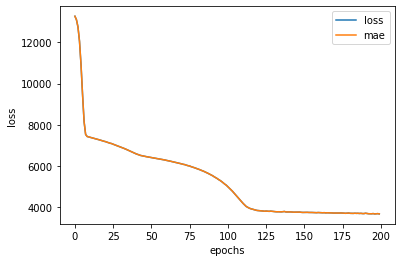

In [398]:
# plot history (also known as a loss curve or a training curve)
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

❓**Question:** How long should you train for?

It depends. It depends on the problem you are working on. However many people have asked this question before.... so tensorflow has a solution! It's called the [Early Stopping Callback](https://https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/EarlyStopping), which is a TensorFlow component you can add to your model to stop training once it stops improving a certain metric.

In [399]:
X_train

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
560,46,19.950,2,1,0,1,0,0,1,0,0
1285,47,24.320,0,1,0,1,0,1,0,0,0
1142,52,24.860,0,1,0,1,0,0,0,1,0
969,39,34.320,5,1,0,1,0,0,0,1,0
486,54,21.470,3,1,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1095,18,31.350,4,1,0,1,0,1,0,0,0
1130,39,23.870,5,1,0,1,0,0,0,1,0
1294,58,25.175,0,0,1,1,0,1,0,0,0
860,37,47.600,2,1,0,0,1,0,0,0,1


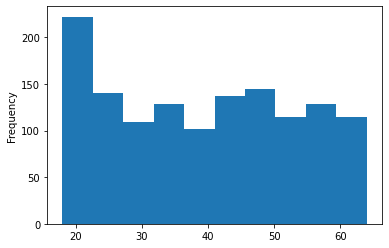

In [400]:
X["age"].plot(kind="hist")

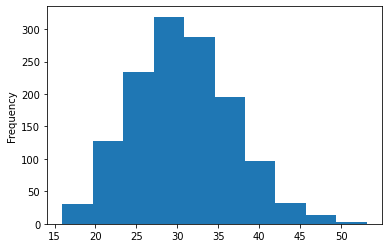

In [401]:
X['bmi'].plot(kind='hist')

In [402]:
X['children'].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

## Preprocessing data (normalization and standardization)

In terms of scaling values, neural networks tend to prefer normalization. 

If you are not sure on which to use, you could try both and see which performs better.

Great article to understand which technique to use : 
https://towardsdatascience.com/scale-standardize-or-normalize-with-scikit-learn-6ccc7d176a02

In [403]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

# Read in the insurance dataframe
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


To prepare our data, we can borrow a few classes from Scikit-Learn.

In [404]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

# Create a column transformer
ct = make_column_transformer(
    (MinMaxScaler(), ['age', 'bmi', 'children']), # turn all values in these columns between 0 and 1
    (OneHotEncoder(handle_unknown="ignore"), ["sex", "smoker", "region"])
)

# Create X and y
X = insurance.drop("charges", axis=1)
y = insurance['charges']

# Build our train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the column transformer to our training data
ct.fit(X_train)

# Transform training and test data with normalization (MinMaxScaler) and OneHotEncoder
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

In [405]:
# What does our data look like now?
X_train.loc[0]

age                19
sex            female
bmi              27.9
children            0
smoker            yes
region      southwest
Name: 0, dtype: object

In [406]:
X_train_normal[0] 

array([0.60869565, 0.10734463, 0.4       , 1.        , 0.        ,
       1.        , 0.        , 0.        , 1.        , 0.        ,
       0.        ])

In [407]:
X_train_normal

array([[0.60869565, 0.10734463, 0.4       , ..., 1.        , 0.        ,
        0.        ],
       [0.63043478, 0.22491256, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.73913043, 0.23944041, 0.        , ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.86956522, 0.24791499, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.41304348, 0.85122411, 0.4       , ..., 0.        , 0.        ,
        1.        ],
       [0.80434783, 0.37503363, 0.        , ..., 0.        , 0.        ,
        1.        ]])

In [408]:
X_train.shape, X_train_normal.shape

((1070, 6), (1070, 11))

Beautiful! Our data has been Normalized and One Hot Encoded. Now let's build a neural network model on it and see how it goes. 

#### `Insurance model 4`

In [409]:
# Build a neural network model to fit on our normalized data
tf.random.set_seed(42)

# 1. Create the model
insurance_model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model 
insurance_model_4.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=['mae'])

# 3. Fit the model
insurance_model_4.fit(X_train_normal, y_train, epochs=100)

Epoch 1/100
34/34 [==============================] - 1s 3ms/step - loss: 13342.6494 - mae: 13342.6494
Epoch 2/100
34/34 [==============================] - 0s 2ms/step - loss: 13333.4785 - mae: 13333.4785
Epoch 3/100
34/34 [==============================] - 0s 2ms/step - loss: 13312.0234 - mae: 13312.0234
Epoch 4/100
34/34 [==============================] - 0s 2ms/step - loss: 13267.7930 - mae: 13267.7930
Epoch 5/100
34/34 [==============================] - 0s 3ms/step - loss: 13189.5830 - mae: 13189.5830
Epoch 6/100
34/34 [==============================] - 0s 3ms/step - loss: 13066.4502 - mae: 13066.4502
Epoch 7/100
34/34 [==============================] - 0s 3ms/step - loss: 12888.1953 - mae: 12888.1953
Epoch 8/100
34/34 [==============================] - 0s 2ms/step - loss: 12644.6523 - mae: 12644.6523
Epoch 9/100
34/34 [==============================] - 0s 2ms/step - loss: 12325.5469 - mae: 12325.5469
Epoch 10/100
34/34 [==============================] - 0s 2ms/step - loss: 11925.96

In [410]:
# Evaluate our insurance model 4 trained on normalized data
insurance_model_4.evaluate(X_test_normal, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 3438.7844 - mae: 3438.7844


[3438.784423828125, 3438.784423828125]

In [411]:
# Insurance model 2 results
# 9/9 [==============================] - 0s 2ms/step - loss: 4924.4956 - mae: 4924.4956